# Add crossing feeding

This notebook tries to verify the idea that
$$
\rho \geq \sqrt{\min(N_S/N_R, N_R/N_S)},
$$
is the stability criterion.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from utils import sample

Trial finished. A function for sampling as follows.

Want to draw a figure with x-axis being $N_S/N_R$ and y-axis being $\rho$. The color map is number of unstable mode?

Just select a horizental line, $\rho = 0.8$

In [154]:
Nr = 48
Ns_span = range(1,Nr*4+1, 4)
NU = np.zeros((len(Ns_span), 100))
rho1s = np.zeros((len(Ns_span), 100))

for i in range(len(Ns_span)):
    Ns = Ns_span[i]
    for j in range(100):
        NU[i, j], rho1s[i,j] = sample(Ns, Nr, 0.0, 0.22, 0, Rl=0.3,Rh=.4)

In [155]:
rho1 = np.mean(rho1s) # define as rho1

In [156]:
FNC = np.mean((NU > 0).astype(float), -1)
std_FNC = np.std((NU > 0).astype(float), -1)/np.sqrt(100)

In [157]:
NU = np.zeros((len(Ns_span), 100))
rho2s = np.zeros((len(Ns_span), 100))

for i in range(len(Ns_span)):
    Ns = Ns_span[i]
    for j in range(100):
        NU[i, j], rho2s[i,j] = sample(Ns, Nr, 0.07, 0.22,0, Rl=0.3,Rh=.4)

In [158]:
FNC1 = np.mean((NU > 0).astype(float), -1)
std_FNC1 = np.std((NU > 0).astype(float), -1)/np.sqrt(100)

In [159]:
rho2 = np.mean(rho2s)

In [160]:
NU = np.zeros((len(Ns_span), 100))
rho3s = np.zeros((len(Ns_span), 100))

for i in range(len(Ns_span)):
    Ns = Ns_span[i]
    for j in range(100):
        NU[i, j], rho3s[i,j] = sample(Ns, Nr, 0.1, 0.22,0, Rl=0.3,Rh=0.4)

In [161]:
FNC2 = np.mean((NU > 0).astype(float), -1)
std_FNC2 = np.std((NU > 0).astype(float), -1)/np.sqrt(100)

In [162]:
rho3 = np.mean(rho3s)

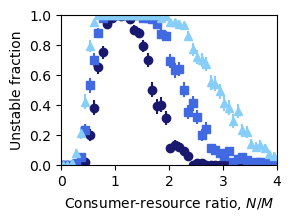

In [167]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)

plt.errorbar(np.array(Ns_span)/Nr, FNC, std_FNC, ls='none', marker = 'o', color = 'midnightblue')
plt.errorbar(np.array(Ns_span)/Nr, FNC1, std_FNC1, ls='none', marker = 's', color = 'royalblue')
plt.errorbar(np.array(Ns_span)/Nr, FNC2, std_FNC2, ls='none', marker = '^', color = 'lightskyblue')
#plt.scatter([12/32,1.0,3.0],[0.05 for i in range(3)],c='r',marker='v')

#plt.plot([0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')
#plt.plot([1/0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')

plt.ylim(0,1)
plt.xlim(0,4)
#plt.xscale('log')
plt.xlabel('Consumer-resource ratio, $N/M$')
plt.ylabel('Unstable fraction')
plt.savefig('../figures/test19-1.eps')

In [164]:
x1 = (np.array(Ns_span)/Nr)**(-1/2/np.log2(rho1))
x2 = (np.array(Ns_span)/Nr)**(-1/2/np.log2(rho2))
x3 = (np.array(Ns_span)/Nr)**(-1/2/np.log2(rho3))

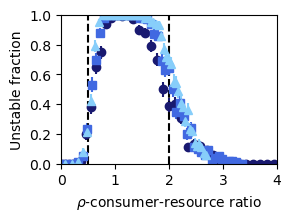

In [166]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)

plt.errorbar(x1, FNC, std_FNC, ls='none', marker = 'o', color = 'midnightblue')
plt.errorbar(x2, FNC1, std_FNC1, ls='none', marker = 's', color = 'royalblue')
plt.errorbar(x3, FNC2, std_FNC2, ls='none', marker = '^', color = 'lightskyblue')

plt.plot([0.5 for i in range(11)],[0.1*i for i in range(11)],'--k')
plt.plot([2 for i in range(11)],[0.1*i for i in range(11)],'--k')

plt.ylim(0,1)
plt.xlim(0,4)
plt.xlabel(r'$\rho$-consumer-resource ratio')
plt.ylabel('Unstable fraction')
plt.savefig('../figures/test19-2.eps')